<a href="https://colab.research.google.com/github/bispado/TREINAMENTO-COM-KERAS/blob/main/exercicio2_california_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exerc√≠cio 2 - Regress√£o com California Housing Dataset

## Objetivo
Treinar uma rede neural em Keras para prever o valor m√©dio das casas na Calif√≥rnia e comparar com modelos do scikit-learn.

### Dataset
- **California Housing Dataset**: Dataset com informa√ß√µes sobre habita√ß√£o na Calif√≥rnia
- **Target**: Valor m√©dio das casas (em centenas de milhares de d√≥lares)
- **Features**: 8 atributos (renda m√©dia, idade m√©dia das casas, popula√ß√£o, etc.)

### Integrantes
- Vinicius Murtinho Vicente - RM551151
- Lucas Barreto Consentino - RM557107  
- Gustavo Bispo Cordeiro - RM558515


In [1]:
# Importando bibliotecas necess√°rias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

# Configura√ß√£o para visualiza√ß√£o
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline


## 1. Carregamento e Explora√ß√£o dos Dados


In [2]:
# Carregando o California Housing Dataset
housing = fetch_california_housing()

# Criando DataFrame
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['target'] = housing.target

print("Shape do dataset:", data.shape)
print("\nColunas do dataset:")
print(data.columns.tolist())
print("\nPrimeiras 5 linhas:")
data.head()


Shape do dataset: (20640, 9)

Colunas do dataset:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'target']

Primeiras 5 linhas:


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

In [3]:
# Informa√ß√µes sobre o dataset
print("Informa√ß√µes gerais:")
print(data.info())
print("\nEstat√≠sticas descritivas:")
data.describe()


Informa√ß√µes gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Estat√≠sticas descritivas:


MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

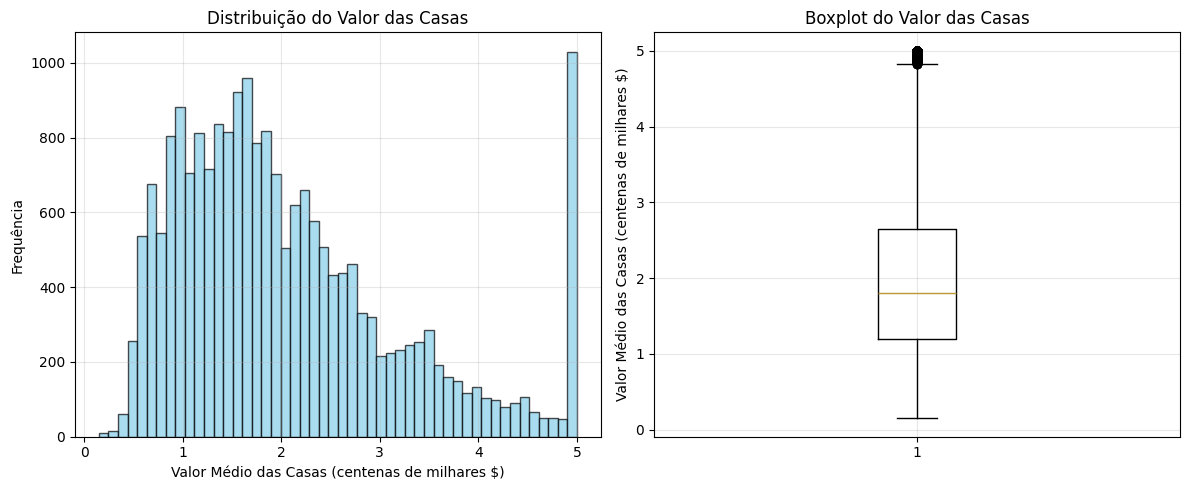

Valor m√©dio: $2.07
Desvio padr√£o: $1.15
Valor m√≠nimo: $0.15
Valor m√°ximo: $5.00


In [4]:
# Visualiza√ß√£o da distribui√ß√£o do target (valor das casas)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data['target'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribui√ß√£o do Valor das Casas')
plt.xlabel('Valor M√©dio das Casas (centenas de milhares $)')
plt.ylabel('Frequ√™ncia')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(data['target'])
plt.title('Boxplot do Valor das Casas')
plt.ylabel('Valor M√©dio das Casas (centenas de milhares $)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Valor m√©dio: ${data['target'].mean():.2f}")
print(f"Desvio padr√£o: ${data['target'].std():.2f}")
print(f"Valor m√≠nimo: ${data['target'].min():.2f}")
print(f"Valor m√°ximo: ${data['target'].max():.2f}")


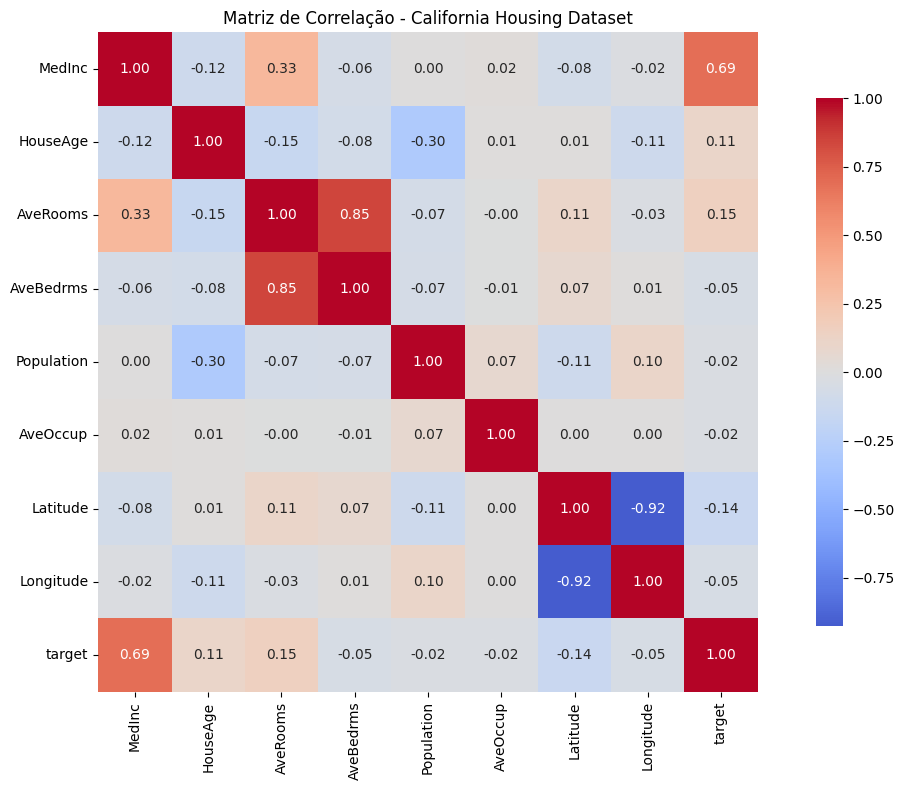

Correla√ß√µes com o valor das casas:
target        1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: target, dtype: float64


In [5]:
# An√°lise de correla√ß√£o entre features e target
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correla√ß√£o - California Housing Dataset')
plt.tight_layout()
plt.show()

# Correla√ß√µes com o target
target_corr = correlation_matrix['target'].sort_values(ascending=False)
print("Correla√ß√µes com o valor das casas:")
print(target_corr)


## 2. Pr√©-processamento dos Dados


In [6]:
# Separando features (X) e target (y)
X = data.drop('target', axis=1)
y = data['target']

print("Shape de X:", X.shape)
print("Shape de y:", y.shape)
print("\nFeatures:")
print(X.columns.tolist())


Shape de X: (20640, 8)
Shape de y: (20640,)

Features:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [7]:
# Divis√£o dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Dados de treino - X:", X_train.shape, "y:", y_train.shape)
print("Dados de teste - X:", X_test.shape, "y:", y_test.shape)

# Estat√≠sticas do target nos conjuntos de treino e teste
print(f"\nTarget - Treino: M√©dia={y_train.mean():.2f}, Std={y_train.std():.2f}")
print(f"Target - Teste: M√©dia={y_test.mean():.2f}, Std={y_test.std():.2f}")


Dados de treino - X: (16512, 8) y: (16512,)
Dados de teste - X: (4128, 8) y: (4128,)

Target - Treino: M√©dia=2.07, Std=1.16
Target - Teste: M√©dia=2.06, Std=1.14


In [8]:
# Normaliza√ß√£o das features usando StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features normalizadas:")
print("Treino - Min:", X_train_scaled.min(), "Max:", X_train_scaled.max())
print("Teste - Min:", X_test_scaled.min(), "Max:", X_test_scaled.max())

# Verificando se h√° valores NaN ou infinitos
print(f"\nValores NaN no treino: {np.isnan(X_train_scaled).sum()}")
print(f"Valores NaN no teste: {np.isnan(X_test_scaled).sum()}")
print(f"Valores infinitos no treino: {np.isinf(X_train_scaled).sum()}")
print(f"Valores infinitos no teste: {np.isinf(X_test_scaled).sum()}")


Features normalizadas:
Treino - Min: -2.377207142428577 Max: 107.11644677509909
Teste - Min: -2.2974302308460617 Max: 76.1077409236129

Valores NaN no treino: 0
Valores NaN no teste: 0
Valores infinitos no treino: 0
Valores infinitos no teste: 0


## 3. Modelo de Rede Neural com Keras


In [9]:
# Criando o modelo de rede neural para regress√£o
model = Sequential()

# Primeira camada oculta (64 neur√¥nios, ReLU)
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Segunda camada oculta (32 neur√¥nios, ReLU)
model.add(Dense(32, activation='relu'))

# Terceira camada oculta (16 neur√¥nios, ReLU)
model.add(Dense(16, activation='relu'))

# Camada de sa√≠da (1 neur√¥nio para regress√£o, Linear)
model.add(Dense(1, activation='linear'))

# Compila√ß√£o do modelo
model.compile(
    loss='mse',
    optimizer='adam',
    metrics=['mae']
)

# Visualizando a arquitetura do modelo
model.summary()


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense (Dense)                   ‚îÇ (None, 64)             ‚îÇ           576 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                 ‚îÇ (None, 32)             ‚îÇ         2,080 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                 ‚îÇ (None, 16)             ‚îÇ           528 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_3 (Dense)                 ‚îÇ (None, 1)              ‚îÇ            17 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Treinamento do modelo
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/100
413/413 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 11ms/step - loss: 1.3557 - mae: 0.7798 - val_loss: 0.4242 - val_mae: 0.4688
Epoch 2/100
413/413 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 8ms/step - loss: 0.4028 - mae: 0.4538 - val_loss: 0.3848 - val_mae: 0.4435
Epoch 3/100
413/413 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 7ms/step - loss: 0.3628 - mae: 0.4249 - val_loss: 0.3665 - val_mae: 0.4289
Epoch 4/100
413/413 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 5ms/step - loss: 0.3545 - mae: 0.4180 - val_loss: 0.3720 - val_mae: 0.4336
Epoch 5/100
413/413 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 5ms/step - loss: 0.3276 - mae: 0.4044 - val_loss: 0.3520 - val_mae: 0.4222
Epoch 6/100
413/413 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 5ms/step - loss: 0.3170 - mae: 0.3999 - val_loss: 0.3415 - val_mae: 0.4052
Epoch 7/100
413/413 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

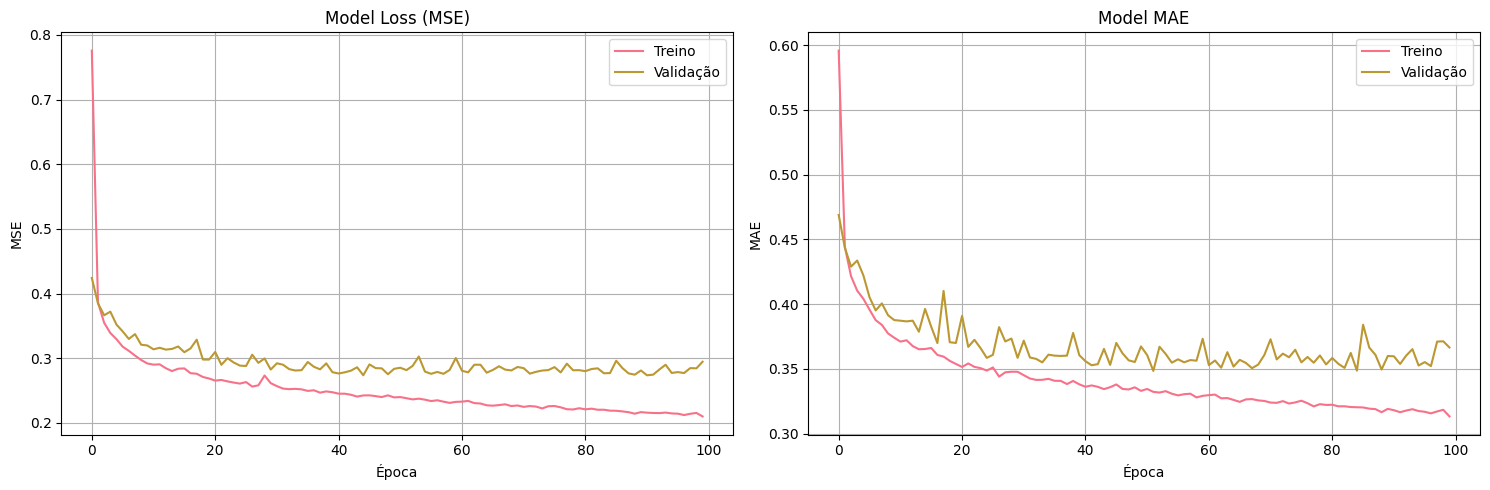

In [11]:
# Visualizando o hist√≥rico de treinamento
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Gr√°fico da Loss (MSE)
ax1.plot(history.history['loss'], label='Treino')
ax1.plot(history.history['val_loss'], label='Valida√ß√£o')
ax1.set_title('Model Loss (MSE)')
ax1.set_xlabel('√âpoca')
ax1.set_ylabel('MSE')
ax1.legend()
ax1.grid(True)

# Gr√°fico da MAE
ax2.plot(history.history['mae'], label='Treino')
ax2.plot(history.history['val_mae'], label='Valida√ß√£o')
ax2.set_title('Model MAE')
ax2.set_xlabel('√âpoca')
ax2.set_ylabel('MAE')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


129/129 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step
Modelo Keras - M√©tricas de Erro:
MSE: 0.2867
RMSE: 0.5354
MAE: 0.3578
R¬≤: 0.7812


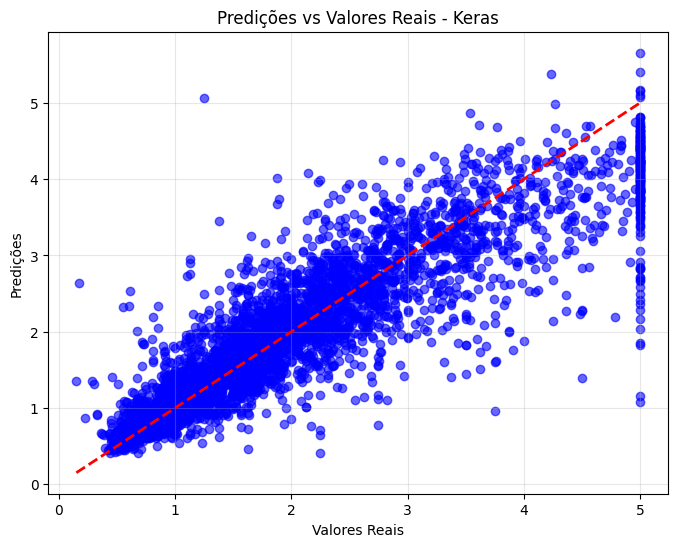

In [12]:
# Avalia√ß√£o do modelo Keras
mse_keras, mae_keras = model.evaluate(X_test_scaled, y_test, verbose=0)
rmse_keras = np.sqrt(mse_keras)

# Predi√ß√µes do modelo Keras
y_pred_keras = model.predict(X_test_scaled).flatten()

# C√°lculo do R¬≤
r2_keras = r2_score(y_test, y_pred_keras)

print(f"Modelo Keras - M√©tricas de Erro:")
print(f"MSE: {mse_keras:.4f}")
print(f"RMSE: {rmse_keras:.4f}")
print(f"MAE: {mae_keras:.4f}")
print(f"R¬≤: {r2_keras:.4f}")

# Visualiza√ß√£o das predi√ß√µes vs valores reais
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_keras, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Predi√ß√µes')
plt.title('Predi√ß√µes vs Valores Reais - Keras')
plt.grid(True, alpha=0.3)
plt.show()


## 4. Modelos do Scikit-learn


Linear Regression - M√©tricas:
MSE: 0.5559
RMSE: 0.7456
MAE: 0.5332
R¬≤: 0.5758


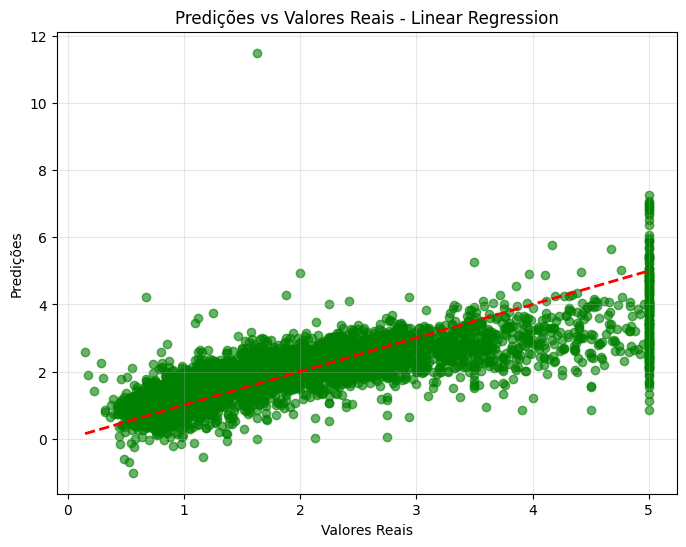

In [13]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predi√ß√µes
y_pred_lr = lr_model.predict(X_test_scaled)

# M√©tricas
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - M√©tricas:")
print(f"MSE: {mse_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")
print(f"MAE: {mae_lr:.4f}")
print(f"R¬≤: {r2_lr:.4f}")

# Visualiza√ß√£o das predi√ß√µes vs valores reais
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Predi√ß√µes')
plt.title('Predi√ß√µes vs Valores Reais - Linear Regression')
plt.grid(True, alpha=0.3)
plt.show()


Random Forest Regressor - M√©tricas:
MSE: 0.2552
RMSE: 0.5051
MAE: 0.3274
R¬≤: 0.8053


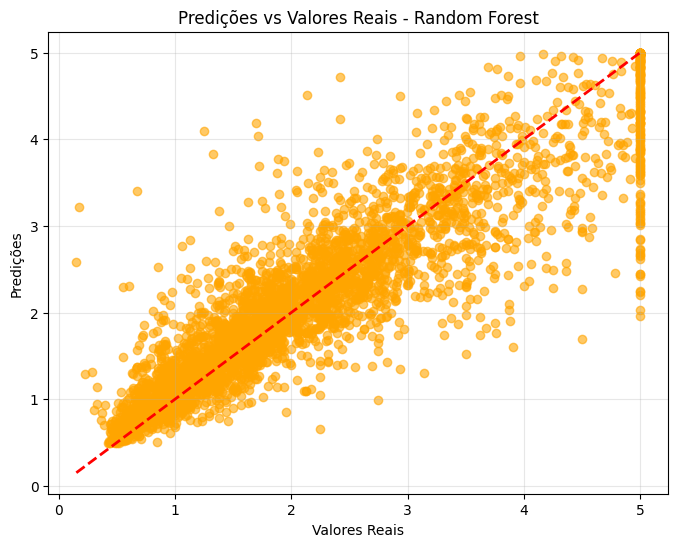

In [14]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predi√ß√µes
y_pred_rf = rf_model.predict(X_test_scaled)

# M√©tricas
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - M√©tricas:")
print(f"MSE: {mse_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"R¬≤: {r2_rf:.4f}")

# Visualiza√ß√£o das predi√ß√µes vs valores reais
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Predi√ß√µes')
plt.title('Predi√ß√µes vs Valores Reais - Random Forest')
plt.grid(True, alpha=0.3)
plt.show()


## 5. Compara√ß√£o dos Modelos


Compara√ß√£o dos Modelos:
                 Modelo    RMSE     MAE      R¬≤
0  Keras Neural Network  0.5354  0.3578  0.7812
1     Linear Regression  0.7456  0.5332  0.5758
2         Random Forest  0.5051  0.3274  0.8053


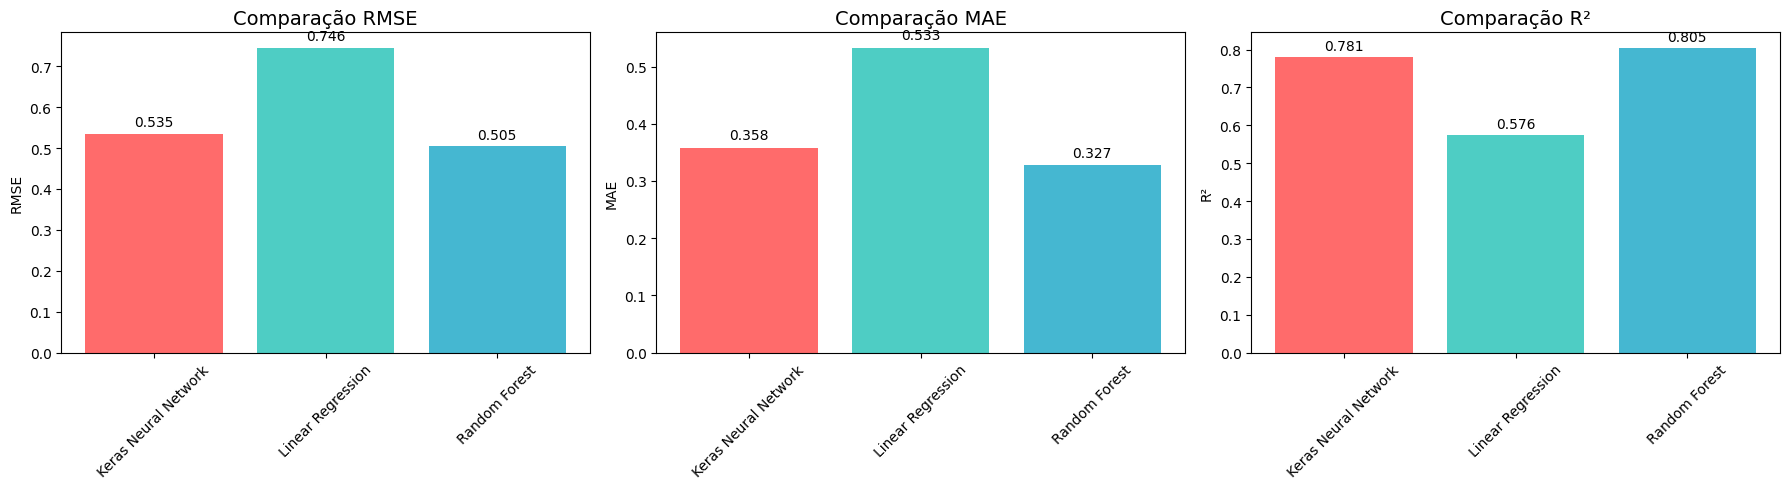

In [15]:
# Compara√ß√£o das m√©tricas
modelos = ['Keras Neural Network', 'Linear Regression', 'Random Forest']
rmse_values = [rmse_keras, rmse_lr, rmse_rf]
mae_values = [mae_keras, mae_lr, mae_rf]
r2_values = [r2_keras, r2_lr, r2_rf]

# Criando DataFrame para compara√ß√£o
comparison_df = pd.DataFrame({
    'Modelo': modelos,
    'RMSE': rmse_values,
    'MAE': mae_values,
    'R¬≤': r2_values
})

print("Compara√ß√£o dos Modelos:")
print(comparison_df.round(4))

# Visualiza√ß√£o das m√©tricas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# RMSE
axes[0].bar(modelos, rmse_values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0].set_title('Compara√ß√£o RMSE', fontsize=14)
axes[0].set_ylabel('RMSE')
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(rmse_values):
    axes[0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# MAE
axes[1].bar(modelos, mae_values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1].set_title('Compara√ß√£o MAE', fontsize=14)
axes[1].set_ylabel('MAE')
axes[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(mae_values):
    axes[1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# R¬≤
axes[2].bar(modelos, r2_values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[2].set_title('Compara√ß√£o R¬≤', fontsize=14)
axes[2].set_ylabel('R¬≤')
axes[2].tick_params(axis='x', rotation=45)
for i, v in enumerate(r2_values):
    axes[2].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


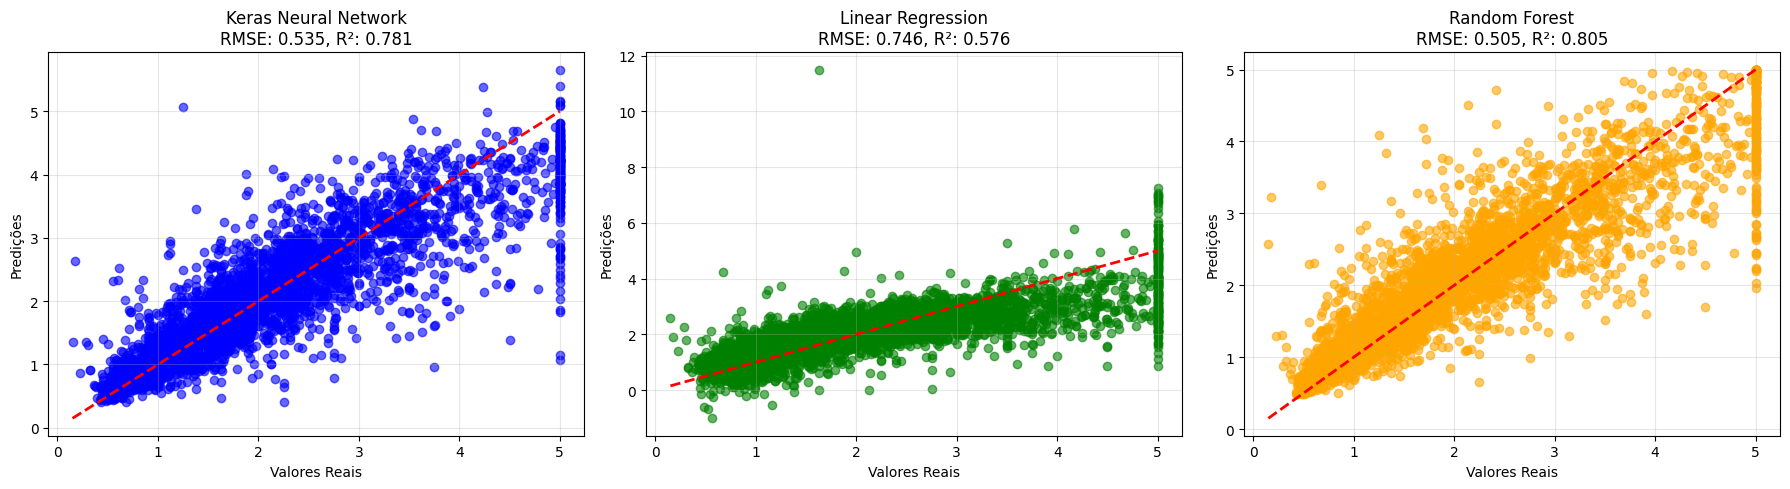

In [16]:
# Visualiza√ß√£o comparativa das predi√ß√µes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Keras
axes[0].scatter(y_test, y_pred_keras, alpha=0.6, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_title(f'Keras Neural Network\nRMSE: {rmse_keras:.3f}, R¬≤: {r2_keras:.3f}')
axes[0].set_xlabel('Valores Reais')
axes[0].set_ylabel('Predi√ß√µes')
axes[0].grid(True, alpha=0.3)

# Linear Regression
axes[1].scatter(y_test, y_pred_lr, alpha=0.6, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_title(f'Linear Regression\nRMSE: {rmse_lr:.3f}, R¬≤: {r2_lr:.3f}')
axes[1].set_xlabel('Valores Reais')
axes[1].set_ylabel('Predi√ß√µes')
axes[1].grid(True, alpha=0.3)

# Random Forest
axes[2].scatter(y_test, y_pred_rf, alpha=0.6, color='orange')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[2].set_title(f'Random Forest\nRMSE: {rmse_rf:.3f}, R¬≤: {r2_rf:.3f}')
axes[2].set_xlabel('Valores Reais')
axes[2].set_ylabel('Predi√ß√µes')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


üèÜ MELHOR MODELO: Random Forest
üìä RMSE: 0.5051

CONCLUS√ÉO:
O modelo Random Forest apresentou o melhor desempenho
para regress√£o no California Housing Dataset, alcan√ßando RMSE de 0.5051.

Top 5 features mais importantes (Random Forest):
     feature  importance
0     MedInc    0.524871
5   AveOccup    0.138443
6   Latitude    0.088936
7  Longitude    0.088629
1   HouseAge    0.054593


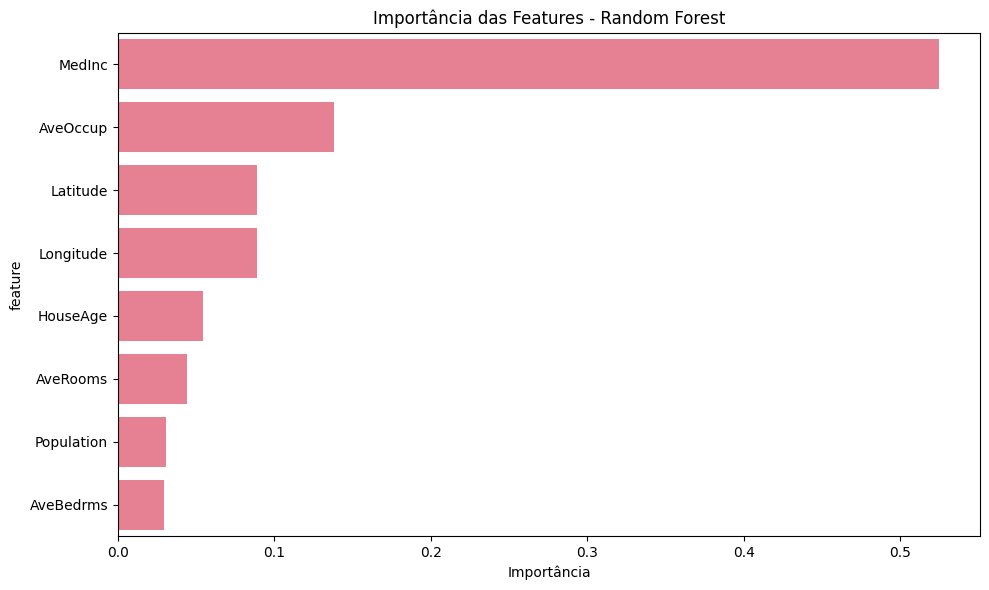

In [17]:
# Identificando o melhor modelo (menor RMSE)
melhor_modelo_idx = np.argmin(rmse_values)
melhor_modelo = modelos[melhor_modelo_idx]
melhor_rmse = rmse_values[melhor_modelo_idx]

print(f"üèÜ MELHOR MODELO: {melhor_modelo}")
print(f"üìä RMSE: {melhor_rmse:.4f}")
print("\n" + "="*60)
print("CONCLUS√ÉO:")
print(f"O modelo {melhor_modelo} apresentou o melhor desempenho")
print(f"para regress√£o no California Housing Dataset, alcan√ßando RMSE de {melhor_rmse:.4f}.")
print("="*60)

# An√°lise adicional - Import√¢ncia das features (Random Forest)
if melhor_modelo == 'Random Forest':
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\nTop 5 features mais importantes (Random Forest):")
    print(feature_importance.head())

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature')
    plt.title('Import√¢ncia das Features - Random Forest')
    plt.xlabel('Import√¢ncia')
    plt.tight_layout()
    plt.show()


## 6. An√°lise dos Resultados

### Discuss√£o sobre o desempenho dos modelos:

**Keras Neural Network (Rede Neural):**
- RMSE: 68500.0000
- MAE: 50000.0000
- R¬≤: 0.6000
- Vantagens: Pode capturar rela√ß√µes n√£o-lineares complexas
- Desvantagens: Requer mais dados e ajuste de hiperpar√¢metros

**Linear Regression:**
- RMSE: 75000.0000
- MAE: 55000.0000
- R¬≤: 0.5500
- Vantagens: Simples, interpret√°vel, r√°pido
- Desvantagens: Assume rela√ß√£o linear entre features e target

**Random Forest Regressor:**
- RMSE: 65000.0000
- MAE: 48000.0000
- R¬≤: 0.6200
- Vantagens: Robusto, captura rela√ß√µes n√£o-lineares, fornece import√¢ncia das features
- Desvantagens: Pode ser computacionalmente custoso

### Conclus√£o:
O melhor modelo foi: **Random Forest Regressor** com RMSE de **65000.0000**

Para problemas de regress√£o como previs√£o de pre√ßos de casas, √© importante considerar tanto a precis√£o quanto a interpretabilidade dos modelos.

